In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model_ann = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)


C:\Users\IT SHOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
loss, accuracy_ann = model_ann.evaluate(X_test, y_test, verbose=0)
y_pred_ann = (model_ann.predict(X_test) > 0.5).astype("int32")
confusion_ann = confusion_matrix(y_test, y_pred_ann)
print("\nANN Model Performance:")
print(f"Accuracy: {accuracy_ann:.4f}")
print(classification_report(y_test, y_pred_ann))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

ANN Model Performance:
Accuracy: 0.9708
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [14]:
svm_model = SVC(kernel='rbf', C=0.1, gamma=0.001)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Model Performance:
Accuracy: 0.7719
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        63
           1       0.73      1.00      0.85       108

    accuracy                           0.77       171
   macro avg       0.87      0.69      0.70       171
weighted avg       0.83      0.77      0.74       171



In [17]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Model Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(classification_report(y_test, y_pred_knn))


KNN Model Performance:
Accuracy: 0.9591
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [19]:
print("\nModel Accuracies:")
print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")


Model Accuracies:
ANN Accuracy: 0.9708
SVM Accuracy: 0.7719
KNN Accuracy: 0.9591


In [21]:
models_accuracy = {"ANN": accuracy_ann, "SVM": accuracy_svm, "KNN": accuracy_knn}
best_model = max(models_accuracy, key=models_accuracy.get)
print(f"\nBest Model by Accuracy: {best_model} with Accuracy: {models_accuracy[best_model]:.4f}")



Best Model by Accuracy: ANN with Accuracy: 0.9708


In [23]:
# Plot Confusion Matrices for each model
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



Confusion Matrices:


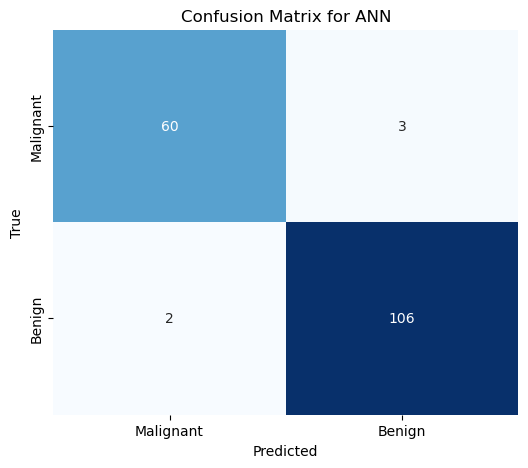

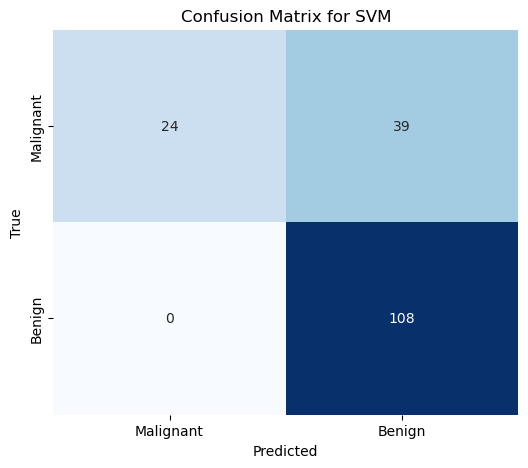

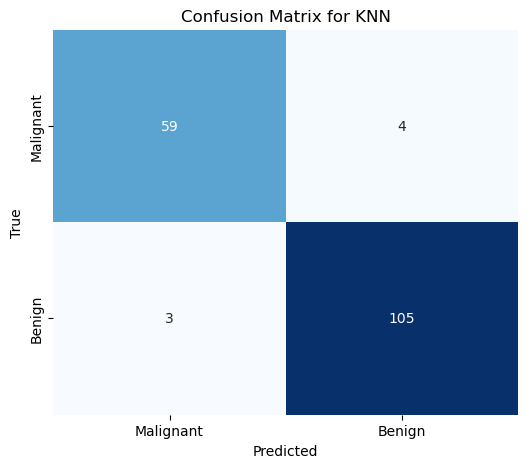

In [26]:
print("\nConfusion Matrices:")
plot_confusion_matrix(confusion_ann, "ANN")
plot_confusion_matrix(confusion_svm, "SVM")
plot_confusion_matrix(confusion_knn, "KNN")